In [13]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import os

In [16]:
# file_celestial = "celestial_data.hdf5"
# file_celestial = "ephemeris_data.hdf5"
# file_simulation = "simulation_data.hdf5"
file_celestial = "ephemeris_data.csv"
file_simulation = "simulation_data_noise_0.csv"

In [19]:
# with h5py.File(file_celestial, 'r') as f1, h5py.File(file_simulation, 'r') as f2:
#     celestial_data = {key: np.array(f1[key]) for key in f1.keys()}
#     simulation_data = {key: np.array(f2[key]) for key in f2.keys()}

# Convert data to DataFrame
# celestial_df = pd.DataFrame(celestial_data)
# simulation_df = pd.DataFrame(simulation_data)
celestial_df = pd.read_csv(file_celestial)
simulation_df = pd.read_csv(file_simulation)

In [ ]:
# celestial_df
# simulation_df
# simulation_df.columns
# simulation_df.head(3)


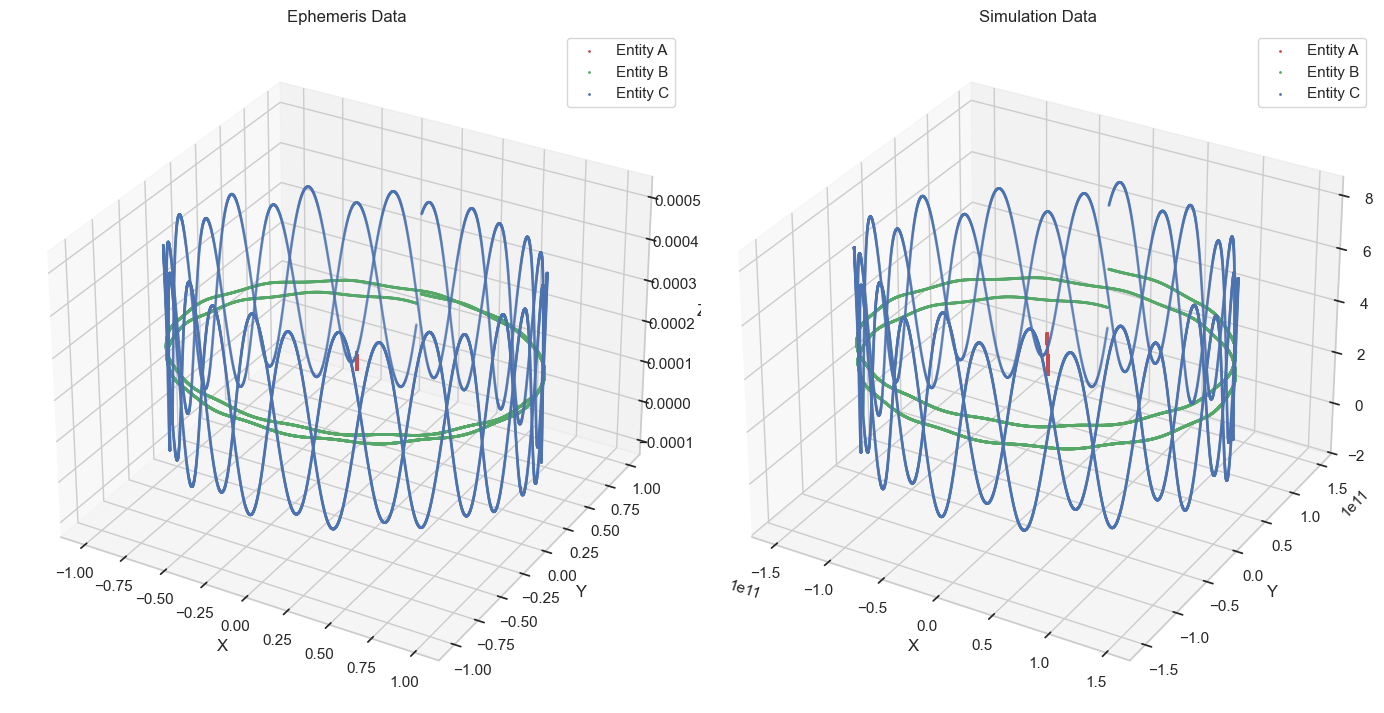

In [20]:
import matplotlib.pyplot as plt

r_A_x_cel = celestial_df['r_A_x']
r_A_y_cel = celestial_df['r_A_y']
r_A_z_cel = celestial_df['r_A_z']

r_B_x_cel = celestial_df['r_B_x']
r_B_y_cel = celestial_df['r_B_y']
r_B_z_cel = celestial_df['r_B_z']

r_C_x_cel = celestial_df['r_C_x']
r_C_y_cel = celestial_df['r_C_y']
r_C_z_cel = celestial_df['r_C_z']


# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 8), subplot_kw={'projection': '3d'})

# Plot the ephemeris data on the first subplot (eph)
axes[0].scatter(r_A_x_cel[:], r_A_y_cel[:], r_A_z_cel[:], color='r', label='Entity A', s=1)
axes[0].scatter(r_B_x_cel[:], r_B_y_cel[:], r_B_z_cel[:], color='g', label='Entity B', s=1)
axes[0].scatter(r_C_x_cel[:], r_C_y_cel[:], r_C_z_cel[:], color='b', label='Entity C', s=1)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_zlabel('Z')
axes[0].set_title('Ephemeris Data')
axes[0].legend()

# Plot the simulation data on the second subplot (sim)
r_A_x_sim = simulation_df['r_A_x']
r_A_y_sim = simulation_df['r_A_y']
r_A_z_sim = simulation_df['r_A_z']

r_B_x_sim = simulation_df['r_B_x']
r_B_y_sim = simulation_df['r_B_y']
r_B_z_sim = simulation_df['r_B_z']

r_C_x_sim = simulation_df['r_C_x']
r_C_y_sim = simulation_df['r_C_y']
r_C_z_sim = simulation_df['r_C_z']

axes[1].scatter(r_A_x_sim, r_A_y_sim, r_A_z_sim, color='r', label='Entity A', s=1)  # Use simulation data here
axes[1].scatter(r_B_x_sim, r_B_y_sim, r_B_z_sim, color='g', label='Entity B', s=1)  # Use simulation data here
axes[1].scatter(r_C_x_sim, r_C_y_sim, r_C_z_sim, color='b', label='Entity C', s=1)  # Use simulation data here
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_zlabel('Z')
axes[1].set_title('Simulation Data')
axes[1].legend()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
plt.show()

In [ ]:
v_A_x_sim = simulation_df['v_A_x']
v_A_y_sim = simulation_df['v_A_y']
v_A_z_sim = simulation_df['v_A_z']

v_B_x_sim = simulation_df['v_B_x']
v_B_y_sim = simulation_df['v_B_y']
v_B_z_sim = simulation_df['v_B_z']

v_C_x_sim = simulation_df['v_C_x']
v_C_y_sim = simulation_df['v_C_y']
v_C_z_sim = simulation_df['v_C_z']

G = 6.6743015e-11  # Gravitational constant (m^3 kg^-1 s^-2). Relative standard uncertainty is 2.2e−5. CODATA-recommended value of the gravitational constant.
earth_mass = 5.9722e24     # Mass of earth in kg (5.9722±0.0006 e24). https://en.wikipedia.org/wiki/Earth_mass
m_A = 332946.0487 * earth_mass  # (332,946.0487±0.0007). The cited value is the recommended value published by the International Astronomical Union in 2009.
m_B = earth_mass  # Mass of earth alone
m_C = 0.0123000371 * earth_mass # Mass of moon alone. Pitjeva, E.V.; Standish, E.M. (1 April 2009).


# Initialize arrays to store energy values
kinetic_energy = []
potential_energy = []
total_energy = []

# Loop through all time steps
for i in range(len(r_A_x_sim)):
    # Extract the positions and velocities at the current time step
    r1 = np.array([r_A_x_sim, r_A_y_sim, r_A_z_sim])  # position of body 1
    r2 = np.array([r_B_x_sim, r_B_y_sim, r_B_z_sim])  # position of body 2
    r3 = np.array([r_C_x_sim, r_C_y_sim, r_C_z_sim])  # position of body 3
    v1 = np.array([v_A_x_sim, v_A_y_sim, v_A_z_sim])  # velocity of body 1
    v2 = np.array([v_B_x_sim, v_B_y_sim, v_B_z_sim])  # velocity of body 2
    v3 = np.array([v_C_x_sim, v_C_y_sim, v_C_z_sim])  # velocity of body 3
    
    # Calculate kinetic energy: K = 1/2 m v^2
    KE = 0.5 * (m_A * np.linalg.norm(v1)**2 + m_B * np.linalg.norm(v2)**2 + m_C * np.linalg.norm(v3)**2)
    kinetic_energy.append(KE)

    # Calculate potential energy: U = -G * m1 * m2 / r (for each pair)
    PE = (-G * m_A * m_B / np.linalg.norm(r1 - r2) - 
          G * m_A * m_C / np.linalg.norm(r1 - r3) - 
          G * m_B * m_C / np.linalg.norm(r2 - r3))
    potential_energy.append(PE)
    
    # Calculate total energy: E = K + U
    total_energy.append(KE + PE)

# Convert lists to arrays for easier plotting
kinetic_energy = np.array(kinetic_energy)
potential_energy = np.array(potential_energy)
total_energy = np.array(total_energy)

# Plot the energy levels over time
plt.plot(total_energy, label='Total Energy')
plt.plot(kinetic_energy, label='Kinetic Energy')
# plt.plot(potential_energy, label='Potential Energy')
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.title("Energy vs Time")
plt.legend()
plt.show()


In [ ]:
# Display basic information
print("Celestial Data Overview:")
print(celestial_df.info())
print("\nSimulation Data Overview:")
print(simulation_df.info())

In [ ]:
# Standardize column names
celestial_df.columns = celestial_df.columns.str.strip().str.lower()
simulation_df.columns = simulation_df.columns.str.strip().str.lower()

# Display basic information
print("Celestial Data Overview:")
print(celestial_df.info())
print("\nSimulation Data Overview:")
print(simulation_df.info())

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# Ensure column alignment for comparison
common_columns = celestial_df.columns.intersection(simulation_df.columns)
if common_columns.empty:
    print("No common columns found between celestial and simulation data.")
else:
    celestial_df = celestial_df[common_columns]
    simulation_df = simulation_df[common_columns]

    # Descriptive statistics
    celestial_stats = celestial_df.describe()
    simulation_stats = simulation_df.describe()

    print("\nCelestial Data Statistics:")
    print(celestial_stats)
    print("\nSimulation Data Statistics:")
    print(simulation_stats)

    # Statistical comparison functions
    def perform_statistical_tests(df1, df2, alpha=0.05):
        results = []
        for column in df1.columns:
            stat, p_ttest = ttest_ind(df1[column], df2[column], equal_var=False, nan_policy='omit')
            _, p_mwu = mannwhitneyu(df1[column], df2[column], alternative='two-sided')
            results.append((column, p_ttest, p_mwu))
        
        results_df = pd.DataFrame(results, columns=['Feature', 'T-test p-value', 'Mann-Whitney U p-value'])
        results_df['T-test Significant'] = results_df['T-test p-value'] < alpha
        results_df['Mann-Whitney U Significant'] = results_df['Mann-Whitney U p-value'] < alpha
        return results_df

    # Perform statistical tests
    comparison_results = perform_statistical_tests(celestial_df, simulation_df)
    print("\nStatistical Test Results:")
    print(comparison_results)

    # Visualization setup
    sns.set(style="whitegrid")
    output_plots = 'three_bodies/'

    # Ensure the output directory exists
    if not os.path.exists(output_plots):
        os.makedirs(output_plots)
        print(f"Created directory: {output_plots}")

    # Create pairwise comparison plots
    for column in common_columns:
        # Density plot
        plt.figure(figsize=(10, 6))
        sns.kdeplot(celestial_df[column], label='Celestial Data', shade=True)
        sns.kdeplot(simulation_df[column], label='Simulation Data', shade=True)
        plt.title(f"Density Plot: {column}")
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.legend()
        density_plot_path = os.path.join(output_plots, f"{column}_density.png")
        plt.savefig(density_plot_path)
        plt.close()

        # Box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=[celestial_df[column], simulation_df[column]], orient='h')
        plt.yticks([0, 1], ['Celestial Data', 'Simulation Data'])
        plt.title(f"Box Plot: {column}")
        plt.xlabel(column)
        box_plot_path = os.path.join(output_plots, f"{column}_boxplot.png")
        plt.savefig(box_plot_path)
        plt.close()

    print(f"Plots saved to {output_plots}")


In [ ]:
print(os.getcwd())